In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [6]:
#Load data
data = pd.read_csv('SEL.csv')

In [8]:
data.head()

,Participants,I say sorry when I have done something wrong,It is easy for me to talk about my feelings,I know what I am not good at,Teachers lie and say I have done something wrong,I am good at lining up,Other people make me fight,Teachers tell me I am disturbing the class,I feel sad,I feel worried,...,I want to understand how other people feel,"If someone is sad, I will try to help them if I can",I have one good friend or more,I like to be with grown-ups than with people my age,Other people my age like me,Other people my age say I am kind,I follow the rules even when no one is watching,I hand in my homework on time,I think before I do something,I study before a test
0,1,4,4,5,5,5,5,5,4,4,...,4,4,4,4,3,3,4,3,5,4
1,2,4,3,5,1,3,3,3,5,3,...,5,4,5,3,5,4,2,5,3,5
2,3,4,2,3,4,5,4,4,3,4,...,3,3,3,3,3,3,3,4,3,3
3,4,5,3,5,4,3,2,3,4,3,...,4,5,5,2,4,3,5,4,4,5
4,5,4,4,3,4,4,5,3,4,4,...,4,5,5,4,5,4,4,3,4,5


In [10]:
data.describe(include='all') 

,Participants,I say sorry when I have done something wrong,It is easy for me to talk about my feelings,I know what I am not good at,Teachers lie and say I have done something wrong,I am good at lining up,Other people make me fight,Teachers tell me I am disturbing the class,I feel sad,I feel worried,...,I want to understand how other people feel,"If someone is sad, I will try to help them if I can",I have one good friend or more,I like to be with grown-ups than with people my age,Other people my age like me,Other people my age say I am kind,I follow the rules even when no one is watching,I hand in my homework on time,I think before I do something,I study before a test
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,...,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,53.500000,4.500000,3.452830,4.037736,3.650943,4.075472,3.981132,3.716981,3.537736,3.773585,...,3.943396,4.386792,4.641509,3.283019,3.962264,3.745283,4.169811,3.783019,3.981132,4.254717
std,30.743563,0.679636,1.061285,0.955431,1.227017,0.801167,1.050906,1.101987,1.122705,1.106543,...,0.983969,0.775466,0.758302,1.127616,1.013476,0.995813,0.821980,0.915524,0.915279,1.060650
min,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,27.250000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,4.000000,5.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000
50%,53.500000,5.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,5.000000,5.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000
75%,79.750000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,...,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000,5.000000
max,106.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [12]:
#Power analysis to see if my sample size is good

In [14]:
import numpy as np
from scipy.stats import ncx2, chi2

def compute_cfa_sample_size(df, effect_size=0.63, alpha=0.05, power=0.80, max_n=2000):
    """Estimate required sample size for CFA using non-central chi-square distribution."""
    
    chi_crit = chi2.ppf(1 - alpha, df)  # Critical chi-square value at alpha = 0.05
    
    base_ncp = effect_size * df  # Expected non-centrality parameter (NCP)
    
    for n in range(50, max_n, 10):  # Start at 50 and iterate upwards
        scaled_ncp = base_ncp * (n / 200)  # Scale NCP for increasing sample sizes
        power_estimated = 1 - ncx2.cdf(chi_crit, df, scaled_ncp)
        
        if power_estimated >= power:
            return n  # Return the first sample size that achieves required power
    
    return f"Sample size exceeds {max_n} (increase search limit)"

# ✅ Compute Degrees of Freedom (df)
observed_variables = 22
latent_variables = 5
estimated_parameters = 22 + 5 + 10 + 22  # Loadings + Variances + Covariances + Error variances
df_cfa = int((observed_variables * (observed_variables + 1) / 2) - estimated_parameters)

# ✅ Compute required sample size
required_sample_size = compute_cfa_sample_size(df_cfa)
print(f"🔹 Required Sample Size for CFA: {required_sample_size}")

🔹 Required Sample Size for CFA: 90


An online calculator also recommended a similar sample size (88), for an anticipated effect size of .6, statistical power of .8, 5 latent variables, 19 observed variables and a probability of .05.  My sample is 107.
Soper, D.S. (2025). A-priori Sample Size Calculator for Structural Equation Models [Software]. Available from https://www.danielsoper.com/statcalc

In [16]:
#missing data

In [18]:
data.isnull()

,Participants,I say sorry when I have done something wrong,It is easy for me to talk about my feelings,I know what I am not good at,Teachers lie and say I have done something wrong,I am good at lining up,Other people make me fight,Teachers tell me I am disturbing the class,I feel sad,I feel worried,...,I want to understand how other people feel,"If someone is sad, I will try to help them if I can",I have one good friend or more,I like to be with grown-ups than with people my age,Other people my age like me,Other people my age say I am kind,I follow the rules even when no one is watching,I hand in my homework on time,I think before I do something,I study before a test
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
102,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
104,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#False stands for avilable data, while true stands for missing data. It doesn't look like there is any missing data so far...

In [20]:
#double check missing data 

In [22]:
data.isnull().sum()

Participants                                           0
I say sorry when I have done something wrong           0
It is easy for me to talk about my feelings            0
I know what I am not good at                           0
Teachers lie and say I have done something wrong       0
I am good at lining up                                 0
Other people make me fight                             0
Teachers tell me I am disturbing the class             0
I feel sad                                             0
I feel worried                                         0
I like to talk in front of people                      0
I like to listen to other people's ideas               0
It is important to respect all cultures                0
I want to understand how other people feel             0
If someone is sad, I will try to help them if I can    0
I have one good friend or more                         0
I like to be with grown-ups than with people my age    0
Other people my age like me    

In [24]:
#this confirms that there is no missing data.

In [28]:
#since the variable names are so long, I will shorten them:

df = pd.read_csv("SEL.csv")  

# Define new column names as a dictionary
rename_dict = {
    "I say sorry when I have done something wrong": "I_say_sorry",
    "It is easy for me to talk about my feelings": "Easy_talk_feelings",
    "I know what I am not good at": "Know_not_good_at",
    "Teachers lie and say I have done something wrong": "Teachers_lie",
    "I am good at lining up": "Good_at_lining_up",
    "Other people make me fight": "Others_make_fight",
    "Teachers tell me I am disturbing the class": "Teachers_disturbing_class",
    "I feel sad": "Feel_sad",
    "I feel worried": "Feel_worried",
    "I like to talk in front of people": "Like_talk_front",
    "I like to listen to other people's ideas": "Like_listen_ideas",
    "It is important to respect all cultures": "Respect_cultures",
    "I want to understand how other people feel": "Understand_others",
    "If someone is sad, I will try to help them if I can": "Help_sad_people",
    "I have one good friend or more": "One_good_friend",
    "I like to be with grown-ups than with people my age": "Prefer_grownups",
    "Other people my age like me": "Peers_like_me",
    "Other people my age say I am kind": "Peers_say_kind",
    "I follow the rules even when no one is watching": "Follow_rules_alone",
    "I hand in my homework on time": "Homework_on_time",
    "I think before I do something": "Think_before_act",
    "I study before a test": "Study_before_test"
}

# Rename columns
df.rename(columns=rename_dict, inplace=True)

# Save the cleaned dataset
df.to_csv("cleaned_SEL.csv", index=False)

# Check the new column names
print(df.head())


   Participants  I_say_sorry  Easy_talk_feelings  Know_not_good_at  \
0             1            4                   4                 5   
1             2            4                   3                 5   
2             3            4                   2                 3   
3             4            5                   3                 5   
4             5            4                   4                 3   

   Teachers_lie  Good_at_lining_up  Others_make_fight  \
0             5                  5                  5   
1             1                  3                  3   
2             4                  5                  4   
3             4                  3                  2   
4             4                  4                  5   

   Teachers_disturbing_class  Feel_sad  Feel_worried  ...  Understand_others  \
0                          5         4             4  ...                  4   
1                          3         5             3  ...                  5

Drop bad variables and unmeaningful variables

Participants is not a meaningful variable, so it will be dropped.
Moreover, survey administrators told me that students thought these questions were unclear:
Prefer_grownups
Like_talk_front
Know_not_good_at
Therefore, the above 3 items will be dropped as well.


In [31]:
df = df.drop(columns=["Participants", "Know_not_good_at", "Like_talk_front", "Prefer_grownups"])


In [33]:
df

,I_say_sorry,Easy_talk_feelings,Teachers_lie,Good_at_lining_up,Others_make_fight,Teachers_disturbing_class,Feel_sad,Feel_worried,Like_listen_ideas,Respect_cultures,Understand_others,Help_sad_people,One_good_friend,Peers_like_me,Peers_say_kind,Follow_rules_alone,Homework_on_time,Think_before_act,Study_before_test
0,4,4,5,5,5,5,4,4,3,5,4,4,4,3,3,4,3,5,4
1,4,3,1,3,3,3,5,3,5,5,5,4,5,5,4,2,5,3,5
2,4,2,4,5,4,4,3,4,3,4,3,3,3,3,3,3,4,3,3
3,5,3,4,3,2,3,4,3,3,5,4,5,5,4,3,5,4,4,5
4,4,4,4,4,5,3,4,4,5,5,4,5,5,5,4,4,3,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,5,5,5,4,4,4,5,4,5,5,5,5,5,4,4,4,3,4,4
102,5,3,4,4,4,3,5,3,4,5,4,4,5,3,5,5,4,5,5
103,4,3,5,4,3,4,4,4,4,5,2,2,5,3,3,4,3,3,2
104,3,2,3,3,2,3,4,5,3,5,4,5,5,4,4,2,3,2,1


In [43]:
df.to_csv("sel_droppedVariable.csv", index=False)


In [45]:
data = pd.read_csv('sel_droppedVariable.csv')

In [47]:
data.head()

,I_say_sorry,Easy_talk_feelings,Teachers_lie,Good_at_lining_up,Others_make_fight,Teachers_disturbing_class,Feel_sad,Feel_worried,Like_listen_ideas,Respect_cultures,Understand_others,Help_sad_people,One_good_friend,Peers_like_me,Peers_say_kind,Follow_rules_alone,Homework_on_time,Think_before_act,Study_before_test
0,4,4,5,5,5,5,4,4,3,5,4,4,4,3,3,4,3,5,4
1,4,3,1,3,3,3,5,3,5,5,5,4,5,5,4,2,5,3,5
2,4,2,4,5,4,4,3,4,3,4,3,3,3,3,3,3,4,3,3
3,5,3,4,3,2,3,4,3,3,5,4,5,5,4,3,5,4,4,5
4,4,4,4,4,5,3,4,4,5,5,4,5,5,5,4,4,3,4,5


In [49]:
#Multivariate normality

In [51]:
from pingouin import multivariate_normality  # Install: pip install pingouin


# Mardia’s Test for Multivariate Normality
mardia_test = multivariate_normality(data, alpha=0.05)
print("\nMardia’s Test:\n", mardia_test)


Mardia’s Test:
 HZResults(hz=1.0775908791846378, pval=0.0, normal=False)


Mardia's p-value is <0.05, therefore, normality is not assumed. I will have to use Robust Maximum Likelihood (MLR). 

In [55]:
#Univariate Normality

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest, anderson, skew, kurtosis

# Load your dataset 
df = pd.read_csv('sel_droppedVariable.csv')

# Select the variables to check
columns_to_check = ["I_say_sorry", "Easy_talk_feelings", "Teachers_lie", "Good_at_lining_up", "Others_make_fight", "Teachers_disturbing_class", "Feel_sad",
                    "Feel_worried", "Like_listen_ideas", "Respect_cultures", "Understand_others", "Help_sad_people", "One_good_friend", "Peers_like_me",
                    "Peers_say_kind", "Follow_rules_alone", "Homework_on_time", "Think_before_act","Study_before_test" ]

# 1. Skewness & Kurtosis
print("Skewness and Kurtosis:")
for col in columns_to_check:
    print(f"{col}: Skewness = {skew(df[col]):.3f}, Kurtosis = {kurtosis(df[col]):.3f}")

# 2. Shapiro-Wilk Test (Good for small samples)
print("\nShapiro-Wilk Test:")
for col in columns_to_check:
    stat, p = shapiro(df[col])
    print(f"{col}: W-statistic = {stat:.3f}, p-value = {p:.3f}")

Skewness and Kurtosis:
I_say_sorry: Skewness = -1.189, Kurtosis = 0.859
Easy_talk_feelings: Skewness = -0.212, Kurtosis = -0.529
Teachers_lie: Skewness = -0.523, Kurtosis = -0.672
Good_at_lining_up: Skewness = -0.359, Kurtosis = -0.771
Others_make_fight: Skewness = -0.655, Kurtosis = -0.621
Teachers_disturbing_class: Skewness = -0.882, Kurtosis = 0.328
Feel_sad: Skewness = -0.318, Kurtosis = -0.884
Feel_worried: Skewness = -0.561, Kurtosis = -0.549
Like_listen_ideas: Skewness = -0.576, Kurtosis = -0.482
Respect_cultures: Skewness = -3.675, Kurtosis = 16.082
Understand_others: Skewness = -0.851, Kurtosis = 0.537
Help_sad_people: Skewness = -1.157, Kurtosis = 0.808
One_good_friend: Skewness = -2.462, Kurtosis = 6.329
Peers_like_me: Skewness = -1.083, Kurtosis = 0.985
Peers_say_kind: Skewness = -0.695, Kurtosis = 0.138
Follow_rules_alone: Skewness = -1.045, Kurtosis = 1.441
Homework_on_time: Skewness = -0.681, Kurtosis = 0.401
Think_before_act: Skewness = -0.487, Kurtosis = -0.687
Study_b

#Shapiro-Wilk's p-value is <0.05, therefore, univariate normality is not assumed.

In [60]:
#Correlations (to look for correlations >.8)

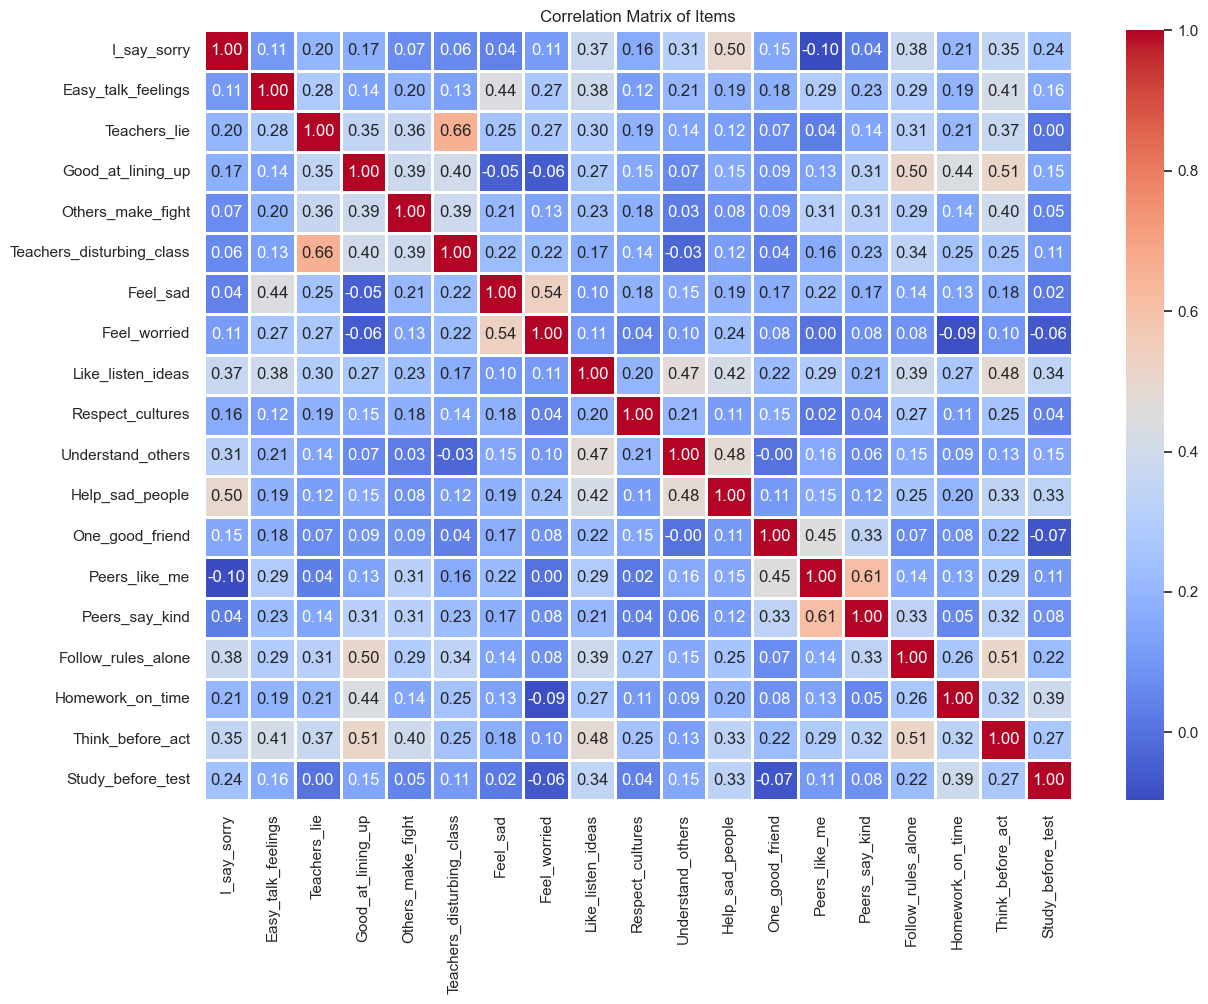

<Figure size 640x480 with 0 Axes>

In [64]:
factors = {
    "Factor 1": ["I_say_sorry", "Easy_talk_feelings", "Teachers_lie"],
    "Factor 2": ["Good_at_lining_up", "Others_make_fight", "Teachers_disturbing_class", "Feel_sad", "Feel_worried"],
    "Factor 3": ["Like_listen_ideas", "Respect_cultures", "Understand_others", "Help_sad_people"],
    "Factor 4": ["One_good_friend", "Peers_like_me", "Peers_say_kind"],
    "Factor 5": ["Follow_rules_alone", "Homework_on_time", "Think_before_act", "Study_before_test"]
}

# 1. Compute Correlation Matrix
correlation_matrix = df.corr()

# Plot heatmap for correlation visualization
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=2)
plt.title("Correlation Matrix of Items")
plt.show()
plt.savefig("Correlation_heatmap.jpg", dpi=300, bbox_inches="tight")

In [66]:
#No extremely high correlation >.8. Check VIF to double check multicollinearity.

In [68]:
#VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load dataset
df = pd.read_csv("sel_droppedVariable.csv") 

# Define factor groups
factors = {
    "Factor 1": ["I_say_sorry", "Easy_talk_feelings", "Teachers_lie"],
    "Factor 2": ["Good_at_lining_up", "Others_make_fight", "Teachers_disturbing_class", "Feel_sad", "Feel_worried"],
    "Factor 3": ["Like_listen_ideas", "Respect_cultures", "Understand_others", "Help_sad_people"],
    "Factor 4": ["One_good_friend", "Peers_like_me", "Peers_say_kind"],
    "Factor 5": ["Follow_rules_alone", "Homework_on_time", "Think_before_act", "Study_before_test"]
}


# Calculate Variance Inflation Factor (VIF) to check for multicollinearity
def calculate_vif(data):
    """Compute VIF for each variable in the dataframe."""
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

# Select only relevant columns for VIF calculation
vif_df = calculate_vif(df)

# Display VIF results
print("Variance Inflation Factor (VIF) Results:")
print(vif_df)


Variance Inflation Factor (VIF) Results:
                     Variable        VIF
0                 I_say_sorry  76.810640
1          Easy_talk_feelings  19.395490
2                Teachers_lie  23.861399
3           Good_at_lining_up  56.978904
4           Others_make_fight  23.736119
5   Teachers_disturbing_class  29.827796
6                    Feel_sad  21.414798
7                Feel_worried  20.467874
8           Like_listen_ideas  54.803760
9            Respect_cultures  61.272185
10          Understand_others  31.588414
11            Help_sad_people  62.497567
12            One_good_friend  57.891170
13              Peers_like_me  41.730859
14             Peers_say_kind  30.152361
15         Follow_rules_alone  50.951055
16           Homework_on_time  29.874838
17           Think_before_act  43.919065
18          Study_before_test  24.974222


In [72]:
vif_df.to_excel("VIF_results.xlsx", index=False)


None of the VIFs are 10 and below, which is the recommeded value. This will most probably cause problems for our model. In any case, I will contine with the analysis and give my recommendations at the end.

In [75]:
#Reliability of latent variables (Cronbach alpha)

In [77]:
#Latent variable- self awareness
def cronbach_alpha(items):
    items = np.array(items)
    n_items = items.shape[1]
    item_variances = np.var(items, axis=0, ddof=1)
    total_variance = np.var(items.sum(axis=1), ddof=1)
    
    if total_variance == 0:  # Prevent division by zero
        return np.nan
    return (n_items / (n_items - 1)) * (1 - item_variances.sum() / total_variance)

# Compute Cronbach’s alpha again
trait_items = df[["I_say_sorry", "Easy_talk_feelings", "Teachers_lie"]]
alpha = cronbach_alpha(trait_items)
print("\nFixed Cronbach’s Alpha:", round(alpha, 3))


Fixed Cronbach’s Alpha: 0.425


Cronbach alpha for self awareness is <.6, which is not good reliability.

In [80]:
#Latent variable- self regulation
def cronbach_alpha(items):
    items = np.array(items)
    n_items = items.shape[1]
    item_variances = np.var(items, axis=0, ddof=1)
    total_variance = np.var(items.sum(axis=1), ddof=1)
    
    if total_variance == 0:  # Prevent division by zero
        return np.nan
    return (n_items / (n_items - 1)) * (1 - item_variances.sum() / total_variance)

# Compute Cronbach’s alpha again
trait_items = df[["Good_at_lining_up", "Others_make_fight", "Teachers_disturbing_class","Feel_sad","Feel_worried"]]
alpha = cronbach_alpha(trait_items)
print("\nFixed Cronbach’s Alpha:", round(alpha, 3))


Fixed Cronbach’s Alpha: 0.617


Cronbach alpha for self regulation is >.6, which is acceptable reliability.

In [83]:
#Latent variable- social awareness
def cronbach_alpha(items):
    items = np.array(items)
    n_items = items.shape[1]
    item_variances = np.var(items, axis=0, ddof=1)
    total_variance = np.var(items.sum(axis=1), ddof=1)
    
    if total_variance == 0:  # Prevent division by zero
        return np.nan
    return (n_items / (n_items - 1)) * (1 - item_variances.sum() / total_variance)

# Compute Cronbach’s alpha again
trait_items = df[["Like_listen_ideas", "Respect_cultures", "Understand_others", "Help_sad_people"]]
alpha = cronbach_alpha(trait_items)
print("\nFixed Cronbach’s Alpha:", round(alpha, 3))


Fixed Cronbach’s Alpha: 0.662


Cronbach alpha for social awareness is >.6, which is acceptable reliability.

In [86]:
#Latent variable- relationship skills
def cronbach_alpha(items):
    items = np.array(items)
    n_items = items.shape[1]
    item_variances = np.var(items, axis=0, ddof=1)
    total_variance = np.var(items.sum(axis=1), ddof=1)
    
    if total_variance == 0:  # Prevent division by zero
        return np.nan
    return (n_items / (n_items - 1)) * (1 - item_variances.sum() / total_variance)

# Compute Cronbach’s alpha again
trait_items = df[["One_good_friend", "Peers_like_me", "Peers_say_kind"]]
alpha = cronbach_alpha(trait_items)
print("\nFixed Cronbach’s Alpha:", round(alpha, 3))


Fixed Cronbach’s Alpha: 0.726


Cronbach alpha for relationship skills is >.7, which is great reliability.

In [89]:
#Latent variable- responsible decision making
def cronbach_alpha(items):
    items = np.array(items)
    n_items = items.shape[1]
    item_variances = np.var(items, axis=0, ddof=1)
    total_variance = np.var(items.sum(axis=1), ddof=1)
    
    if total_variance == 0:  # Prevent division by zero
        return np.nan
    return (n_items / (n_items - 1)) * (1 - item_variances.sum() / total_variance)

# Compute Cronbach’s alpha again
trait_items = df[["Follow_rules_alone", "Homework_on_time", "Think_before_act", "Study_before_test"]]
alpha = cronbach_alpha(trait_items)
print("\nFixed Cronbach’s Alpha:", round(alpha, 3))


Fixed Cronbach’s Alpha: 0.658


Cronbach alpha for responsible decision making is >.6, which is acceptable reliability.


Since the only unacceptabe Cronbach alpha is self awareness (.425), I will run 2 cfa models. One with self awareness and one without. I will then compare the models to see which one is better.

In [93]:
#Model 1 with all 5 latent variables

In [97]:
pip install --upgrade semopy

Note: you may need to restart the kernel to use updated packages.


In [99]:
pip install semopy graphviz       #Because I would like a graphic representation of the model


Note: you may need to restart the kernel to use updated packages.


#CFA on model 1 (model with all 5 latent variables)

In [116]:
# import libraries

import pandas as pd
import semopy
from semopy import Model
from semopy.stats import calc_stats
import graphviz
from semopy.inspector import inspect
import matplotlib.pyplot as plt


In [118]:
# Load dataset
df = pd.read_csv("sel_droppedVariable.csv") 

In [120]:
# Define CFA model with Robust Maximum Likelihood
model_spec = """
SelfAwareness =~ I_say_sorry + Easy_talk_feelings + Teachers_lie
SelfRegulation =~ Good_at_lining_up + Others_make_fight + Teachers_disturbing_class + Feel_sad + Feel_worried
SocialAwareness =~ Like_listen_ideas + Respect_cultures + Understand_others + Help_sad_people
RelationshipSkills =~ One_good_friend + Peers_like_me + Peers_say_kind
ResponsibleDecisions =~ Follow_rules_alone + Homework_on_time + Think_before_act + Study_before_test
"""

# Load dataset
df = pd.read_csv('sel_droppedVariable.csv')

# Fit the model using Robust Maximum Likelihood (MLW)
model = Model(model_spec)
model.fit(df, obj="MLW")   #MLR estimation

# Get factor loadings
factor_loadings = inspect(model, std_est=True)
print(factor_loadings)

# Compute goodness-of-fit indices
fit_indices = calc_stats(model)

# Display results
print("Goodness-of-Fit Indices:")
print(fit_indices)


                         lval  op                       rval  Estimate  \
0                 I_say_sorry   ~              SelfAwareness  1.000000   
1          Easy_talk_feelings   ~              SelfAwareness  1.433687   
2                Teachers_lie   ~              SelfAwareness  2.582699   
3           Good_at_lining_up   ~             SelfRegulation  1.000000   
4           Others_make_fight   ~             SelfRegulation  1.306632   
5   Teachers_disturbing_class   ~             SelfRegulation  1.571176   
6                    Feel_sad   ~             SelfRegulation  0.899814   
7                Feel_worried   ~             SelfRegulation  0.659307   
8           Like_listen_ideas   ~            SocialAwareness  1.000000   
9            Respect_cultures   ~            SocialAwareness  0.252846   
10          Understand_others   ~            SocialAwareness  0.852923   
11            Help_sad_people   ~            SocialAwareness  0.682046   
12            One_good_friend   ~     

In [122]:
#create a table with factor loads that is a bit seasier to read. I will not include p-values since they are all significant.

In [134]:
import pandas as pd

# Create the factor loadings dataframe
factor_loadings_df = pd.DataFrame({
    "Item Label": [
        "I_say_sorry", "Easy_talk_feelings", "Teachers_lie",
        "Good_at_lining_up", "Others_make_fight", "Teachers_disturbing_class", "Feel_sad", "Feel_worried",
        "Like_listen_ideas", "Respect_cultures", "Understand_others", "Help_sad_people",
        "One_good_friend", "Peers_like_me", "Peers_say_kind",
        "Follow_rules_alone", "Homework_on_time", "Think_before_act", "Study_before_test"
    ],
    "Latent Variable": [
        "SelfAwareness", "SelfAwareness", "SelfAwareness",
        "SelfRegulation", "SelfRegulation", "SelfRegulation", "SelfRegulation", "SelfRegulation",
        "SocialAwareness", "SocialAwareness", "SocialAwareness", "SocialAwareness",
        "RelationshipSkills", "RelationshipSkills", "RelationshipSkills",
        "ResponsibleDecisions", "ResponsibleDecisions", "ResponsibleDecisions", "ResponsibleDecisions"
    ],
    "Factor Loading": [
        1.000000, 1.433687, 2.582699,
        1.000000, 1.306632, 1.571176, 0.899814, 0.659307,
        1.000000, 0.252846, 0.852923, 0.682046,
        1.000000, 2.356276, 1.878413,
        1.000000, 0.768078, 1.276505, 0.714532
    ]  # <-- Fixed closing bracket
})

# Display the table for user
print(factor_loadings_df)

#Save table as excel file
factor_loadings_df.to_excel("Factor_Loadings.xlsx", index=False)
print("Factor loadings table saved as 'Factor_Loadings.xlsx'")



                   Item Label       Latent Variable  Factor Loading
0                 I_say_sorry         SelfAwareness        1.000000
1          Easy_talk_feelings         SelfAwareness        1.433687
2                Teachers_lie         SelfAwareness        2.582699
3           Good_at_lining_up        SelfRegulation        1.000000
4           Others_make_fight        SelfRegulation        1.306632
5   Teachers_disturbing_class        SelfRegulation        1.571176
6                    Feel_sad        SelfRegulation        0.899814
7                Feel_worried        SelfRegulation        0.659307
8           Like_listen_ideas       SocialAwareness        1.000000
9            Respect_cultures       SocialAwareness        0.252846
10          Understand_others       SocialAwareness        0.852923
11            Help_sad_people       SocialAwareness        0.682046
12            One_good_friend    RelationshipSkills        1.000000
13              Peers_like_me    RelationshipSki

Since the factor loading for Respect_cultures is so low, I would like to see what happens
to the reliabity (Cronbach alpha) when I remove it from its latent variable.

In [137]:
#Latent variable- social awareness
def cronbach_alpha(items):
    items = np.array(items)
    n_items = items.shape[1]
    item_variances = np.var(items, axis=0, ddof=1)
    total_variance = np.var(items.sum(axis=1), ddof=1)
    
    if total_variance == 0:  # Prevent division by zero
        return np.nan
    return (n_items / (n_items - 1)) * (1 - item_variances.sum() / total_variance)

# Compute Cronbach’s alpha again
trait_items = df[["Like_listen_ideas", "Understand_others", "Help_sad_people"]]
alpha = cronbach_alpha(trait_items)
print("\nFixed Cronbach’s Alpha:", round(alpha, 3))




Fixed Cronbach’s Alpha: 0.712


When I remove Respect_cultures from the latent variable social awareness, the Cronbach alpha goes from 0.662 
to 0.712. I will run the CFA again and remove this item.

In [140]:
#CFA Model 1 revision (without item Respect_cultures)

In [142]:
# Define CFA model with Robust Maximum Likelihood
model_spec = """
SelfAwareness =~ I_say_sorry + Easy_talk_feelings + Teachers_lie
SelfRegulation =~ Good_at_lining_up + Others_make_fight + Teachers_disturbing_class + Feel_sad + Feel_worried
SocialAwareness =~ Like_listen_ideas + Understand_others + Help_sad_people
RelationshipSkills =~ One_good_friend + Peers_like_me + Peers_say_kind
ResponsibleDecisions =~ Follow_rules_alone + Homework_on_time + Think_before_act + Study_before_test
"""

# Load dataset
df = pd.read_csv('sel_droppedVariable.csv')

# Fit the model using Robust Maximum Likelihood (MLW)
model = Model(model_spec)
model.fit(df, obj="MLW")   #MLR estimation

# Get factor loadings
factor_loadings = inspect(model, std_est=True)
print(factor_loadings)

# Compute goodness-of-fit indices
fit_indices = calc_stats(model)

# Display results
print("Goodness-of-Fit Indices:")
print(fit_indices)

                         lval  op                       rval  Estimate  \
0                 I_say_sorry   ~              SelfAwareness  1.000000   
1          Easy_talk_feelings   ~              SelfAwareness  1.442304   
2                Teachers_lie   ~              SelfAwareness  2.604480   
3           Good_at_lining_up   ~             SelfRegulation  1.000000   
4           Others_make_fight   ~             SelfRegulation  1.312135   
5   Teachers_disturbing_class   ~             SelfRegulation  1.578861   
6                    Feel_sad   ~             SelfRegulation  0.911790   
7                Feel_worried   ~             SelfRegulation  0.662656   
8           Like_listen_ideas   ~            SocialAwareness  1.000000   
9           Understand_others   ~            SocialAwareness  0.839383   
10            Help_sad_people   ~            SocialAwareness  0.674706   
11            One_good_friend   ~         RelationshipSkills  1.000000   
12              Peers_like_me   ~     

-Model 1 summary-
All factor loadings are significant and > .3. The chi-square is 289.63 (p = <.001). The CFI = .702, TLI = .636, RMSEA = .111.

All of these show that this is not a good model fit since chi-square is significant, CFI is below the recommended >.90,
the TLI is below the recommended >.90, and the RMSEA is above the recommended <.08.

#Model 2: without latent variable self-awareness due to low Cronback alpha (.425) and without Respect_cultures from
the latent variable social awareness due to low factor loading.

In [146]:
# Define CFA model with Robust Maximum Likelihood
model_spec = """
SelfRegulation =~ Good_at_lining_up + Others_make_fight + Teachers_disturbing_class + Feel_sad + Feel_worried
SocialAwareness =~ Like_listen_ideas + Understand_others + Help_sad_people
RelationshipSkills =~ One_good_friend + Peers_like_me + Peers_say_kind
ResponsibleDecisions =~ Follow_rules_alone + Homework_on_time + Think_before_act + Study_before_test
"""

# Load dataset
df = pd.read_csv('sel_droppedVariable.csv')

# Fit the model using Robust Maximum Likelihood (MLW)
model = Model(model_spec)
model.fit(df, obj="MLW")   #MLR estimation

# Get factor loadings
factor_loadings = inspect(model, std_est=True)
print(factor_loadings)

# Compute goodness-of-fit indices
fit_indices = calc_stats(model)

# Display results
print("Goodness-of-Fit Indices:")
print(fit_indices)

                         lval  op                       rval  Estimate  \
0           Good_at_lining_up   ~             SelfRegulation  1.000000   
1           Others_make_fight   ~             SelfRegulation  1.038113   
2   Teachers_disturbing_class   ~             SelfRegulation  1.041344   
3                    Feel_sad   ~             SelfRegulation  0.421234   
4                Feel_worried   ~             SelfRegulation  0.222539   
5           Like_listen_ideas   ~            SocialAwareness  1.000000   
6           Understand_others   ~            SocialAwareness  0.816570   
7             Help_sad_people   ~            SocialAwareness  0.670726   
8             One_good_friend   ~         RelationshipSkills  1.000000   
9               Peers_like_me   ~         RelationshipSkills  2.215274   
10             Peers_say_kind   ~         RelationshipSkills  1.902519   
11         Follow_rules_alone   ~       ResponsibleDecisions  1.000000   
12           Homework_on_time   ~     

Since the factor loading for Feel_worried and Feel_sad have p-values that are no longer significant, I will remove them from the model.  I would also like to see what happens to the reliability (Cronbach alpha) when I remove these from its latent variable.

In [150]:
#Latent variable- self regulation
def cronbach_alpha(items):
    items = np.array(items)
    n_items = items.shape[1]
    item_variances = np.var(items, axis=0, ddof=1)
    total_variance = np.var(items.sum(axis=1), ddof=1)
    
    if total_variance == 0:  # Prevent division by zero
        return np.nan
    return (n_items / (n_items - 1)) * (1 - item_variances.sum() / total_variance)

# Compute Cronbach’s alpha again
trait_items = df[["Good_at_lining_up", "Others_make_fight", "Teachers_disturbing_class"]]
alpha = cronbach_alpha(trait_items)
print("\nFixed Cronbach’s Alpha:", round(alpha, 3))


Fixed Cronbach’s Alpha: 0.65


When I remove Feel_worried and Feel_sad from the latent variable self regulation, the Cronbach alpha goes from 0.617 to
0.650, which is a slight improvement in reliability, and it is still acceptable.

In [153]:
#CFA Model 2 revision (without items Feel_worried and Feel_sad).

In [155]:
# Define CFA model with Robust Maximum Likelihood
model_spec = """
SelfRegulation =~ Good_at_lining_up + Others_make_fight + Teachers_disturbing_class
SocialAwareness =~ Like_listen_ideas + Understand_others + Help_sad_people
RelationshipSkills =~ One_good_friend + Peers_like_me + Peers_say_kind
ResponsibleDecisions =~ Follow_rules_alone + Homework_on_time + Think_before_act + Study_before_test
"""

# Load dataset
df = pd.read_csv('sel_droppedVariable.csv')

# Fit the model using Robust Maximum Likelihood (MLW)
model = Model(model_spec)
model.fit(df, obj="MLW")   #MLR estimation

# Get factor loadings
factor_loadings = inspect(model, std_est=True)
print(factor_loadings)

# Compute goodness-of-fit indices
fit_indices = calc_stats(model)

# Display results
print("Goodness-of-Fit Indices:")
print(fit_indices)

                         lval  op                       rval  Estimate  \
0           Good_at_lining_up   ~             SelfRegulation  1.000000   
1           Others_make_fight   ~             SelfRegulation  0.921411   
2   Teachers_disturbing_class   ~             SelfRegulation  0.934776   
3           Like_listen_ideas   ~            SocialAwareness  1.000000   
4           Understand_others   ~            SocialAwareness  0.824215   
5             Help_sad_people   ~            SocialAwareness  0.679997   
6             One_good_friend   ~         RelationshipSkills  1.000000   
7               Peers_like_me   ~         RelationshipSkills  2.220846   
8              Peers_say_kind   ~         RelationshipSkills  1.887882   
9          Follow_rules_alone   ~       ResponsibleDecisions  1.000000   
10           Homework_on_time   ~       ResponsibleDecisions  0.822426   
11           Think_before_act   ~       ResponsibleDecisions  1.239437   
12          Study_before_test   ~     

Model 2 summary

Model 2 demonstrates an improved fit compared to Model 1, as shown by better goodness-of-fit indices.

Factor Loadings: All factor loadings are significant and high, indicating strong relationships between observed variables and their respective latent constructs.

Chi-Square Test: The chi-square value (χ² = 89.38, p = .006) remains significant, suggesting that the model still deviates from perfect fit. However, chi-square is highly sensitive to sample size, so alternative fit indices are also considered.

CFI =.91: Now above the recommended threshold of >.90, indicating an acceptable fit.

TLI =.882: Although still below the >.90 threshold, it has shown a notable improvement from Model 1 (.636 → .882).

RMSEA =.07: Now below the recommended <.08, suggesting a reasonable fit.



--Conclusion
Although model 2 has improved, the TLI is still below the ideal threshold and should be improved, and the VIF scores were very high
(range from 19.39 to 76.81), suggesting severe multicollinearity which means that some items may be measuring the same underlying concept, rather than distinct constructs.

Suggestions
Identify and remove highly redundant items that might be measuring the same aspect of a latent variable.
Conduct Exploratory Factor Analysis (EFA) to see if some items load onto multiple factors or if they cluster too closely.
Re-evaluate factor structure: Some items might fit better under a different latent variable than originally hypothesized.
Modify the model by removing problematic items and testing whether the fit indices improve.



In [160]:
#Model fit comparison diagrams

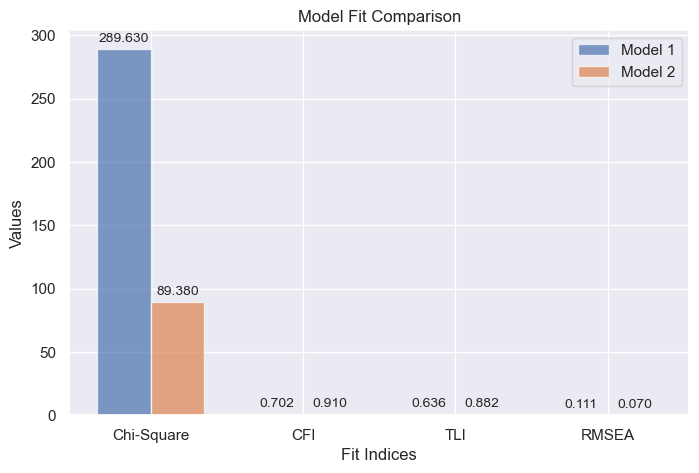

In [176]:
import matplotlib.pyplot as plt
import numpy as np

# Fit indices for visualization
indices = ["Chi-Square", "CFI", "TLI", "RMSEA"]
model_1_values = [289.63, 0.702, 0.636, 0.111]
model_2_values = [89.38, 0.91, 0.882, 0.07]

# Set positions for bar groups
x = np.arange(len(indices))
width = 0.35  

# Create bar chart
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, model_1_values, width, label="Model 1", alpha=0.7)
bars2 = ax.bar(x + width/2, model_2_values, width, label="Model 2", alpha=0.7)

# Labels and title
ax.set_xlabel("Fit Indices")
ax.set_ylabel("Values")
ax.set_title("Model Fit Comparison")
ax.set_xticks(x)
ax.set_xticklabels(indices)
ax.legend()

# Show value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

# Show plot
plt.show()


In [178]:
fig.savefig("Model_Fit_Comparison.png", dpi=300, bbox_inches="tight")
print("Model fit comparison chart saved as 'Model_Fit_Comparison.png'")


Model fit comparison chart saved as 'Model_Fit_Comparison.png'
